**Binary Classification using Logistic Regression**

In [1]:
# Importing The Required Packages

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Loading The Dataframe

df = pd.read_csv("insurance_data.csv")
df.sample(5)

,age,bought_insurance
4,46,1
8,62,1
0,22,0
13,29,0
12,27,0


In [3]:
df.shape

(27, 2)

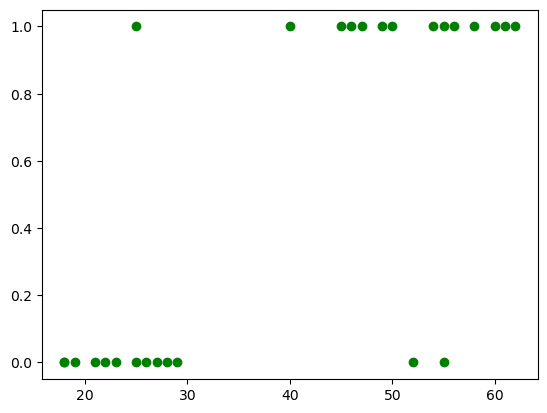

In [4]:
# Scatter Plot

plt.scatter(df.age,df.bought_insurance,color='green')

In [5]:
# Splitting the dataframe into Train and Test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [8]:
type(df[['age']])

pandas.core.frame.DataFrame

In [6]:
X_test

,age
11,28
21,26
26,23
9,61
16,25
8,62


In [7]:

y_test

11    0
21    0
26    0
9     1
16    1
8     1
Name: bought_insurance, dtype: int64

In [8]:
# Logistic Regression Model creation

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [9]:
# Fitting the model with the training data

model.fit(X_train, y_train)


LogisticRegression()

In [10]:
# Making predictions through the trained model

y_predicted = model.predict(X_test)

In [12]:
y_predicted

array([0, 0, 0, 1, 0, 1], dtype=int64)

In [13]:
X_test

,age
11,28
21,26
26,23
9,61
16,25
8,62


In [14]:
# Predicted probabilities for Test set

model.predict_proba(X_test)

array([[0.87703305, 0.12296695],
       [0.90667283, 0.09332717],
       [0.93918823, 0.06081177],
       [0.04170423, 0.95829577],
       [0.91895191, 0.08104809],
       [0.0359479 , 0.9640521 ]])

In [15]:
# Model Score

model.score(X_test,y_test)

0.8333333333333334

In [16]:
# Model Coefficient/Slope

model.coef_

array([[0.15452069]])

In [17]:
# Model Intercept

model.intercept_

array([-6.29120845])

In [18]:
# Defining the Sigmoid/Logit function manually

import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [19]:
# Defining a manual prediction function

def prediction_function(age):
    z = 0.11849788 * age - 4.7976649 
    y = sigmoid(z)
    return y

In [12]:
X_test

,age
7,60
18,19
4,46
5,56
10,18
19,18


In [21]:
# Making predictions

prediction_function(60)

0.9098830579092433

In [22]:
# Making predictions

prediction_function(18)

0.06508855659835197

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[3, 0],
       [1, 2]], dtype=int64)

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6

